In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
#Import The Google API key.
from config import weather_api_key1
print(weather_api_key1)

30a8c9326714af2a3dd1d9aed82ffcfc


In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [22]:
# Create a list for holding the cities.
cities = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key1
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
   
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | marystown
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | namatanai
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | san policarpo
Processing Record 20 of Set 1

Processing Record 35 of Set 4 | pousat
City not found. Skipping...
Processing Record 36 of Set 4 | qaanaaq
Processing Record 37 of Set 4 | gaurnadi
Processing Record 38 of Set 4 | takanabe
Processing Record 39 of Set 4 | canakkale
Processing Record 40 of Set 4 | hollins
Processing Record 41 of Set 4 | ayame
Processing Record 42 of Set 4 | solomenskoye
Processing Record 43 of Set 4 | savannakhet
Processing Record 44 of Set 4 | emba
Processing Record 45 of Set 4 | igarka
Processing Record 46 of Set 4 | kisangani
Processing Record 47 of Set 4 | aflu
City not found. Skipping...
Processing Record 48 of Set 4 | lorengau
Processing Record 49 of Set 4 | chalakudi
Processing Record 50 of Set 4 | sorland
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | new norfolk
Processing Record 4 of Set 5 | najran
Processing Record 5 of Set 5 | sapa
Processing Record 6 of Set 5 | taltal
Processing Record 7 of Set 5 | terrak
Processing Reco

Processing Record 24 of Set 8 | port hueneme
Processing Record 25 of Set 8 | umm bab
Processing Record 26 of Set 8 | myanaung
Processing Record 27 of Set 8 | halalo
City not found. Skipping...
Processing Record 28 of Set 8 | manacapuru
Processing Record 29 of Set 8 | goulburn
Processing Record 30 of Set 8 | phrai bung
City not found. Skipping...
Processing Record 31 of Set 8 | bodden town
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | mach
Processing Record 34 of Set 8 | takoradi
Processing Record 35 of Set 8 | bacalar
Processing Record 36 of Set 8 | key largo
Processing Record 37 of Set 8 | abha
Processing Record 38 of Set 8 | troyes
Processing Record 39 of Set 8 | north bend
Processing Record 40 of Set 8 | mocuba
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | atascadero
Processing Record 43 of Set 8 | sur
Processing Record 44 of Set 8 | buala
Processing Record 45 of Set 8 | nemuro
Processing Record 46 of Set 8 | petropavlovsk-kamchatskiy

Processing Record 10 of Set 12 | naze
Processing Record 11 of Set 12 | cayenne
Processing Record 12 of Set 12 | yomitan
City not found. Skipping...
Processing Record 13 of Set 12 | cascais
Processing Record 14 of Set 12 | goundi
Processing Record 15 of Set 12 | labytnangi
Processing Record 16 of Set 12 | kuytun
Processing Record 17 of Set 12 | samfya
Processing Record 18 of Set 12 | beira
Processing Record 19 of Set 12 | mangai
Processing Record 20 of Set 12 | clyde river
Processing Record 21 of Set 12 | kanjiza
Processing Record 22 of Set 12 | tanda
Processing Record 23 of Set 12 | iwanai
Processing Record 24 of Set 12 | pingliang
Processing Record 25 of Set 12 | westerland
Processing Record 26 of Set 12 | panguna
Processing Record 27 of Set 12 | tototlan
Processing Record 28 of Set 12 | ilulissat
Processing Record 29 of Set 12 | cubulco
Processing Record 30 of Set 12 | alberton
Processing Record 31 of Set 12 | araouane
Processing Record 32 of Set 12 | sinnamary
Processing Record 33 o

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
df = pd.DataFrame(city_data)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,73.00,63,14,8.99,NZ,2021-01-15 23:48:59
1,Barrow,71.2906,-156.7887,-11.20,77,1,16.11,US,2021-01-15 23:46:09
2,Yellowknife,62.4560,-114.3525,10.40,92,90,13.80,CA,2021-01-15 23:50:05
3,Arraial Do Cabo,-22.9661,-42.0278,77.00,88,0,19.57,BR,2021-01-15 23:50:05
4,Thompson,55.7435,-97.8558,6.80,78,75,4.61,CA,2021-01-15 23:50:05
5,Marystown,47.1666,-55.1483,32.81,89,100,25.95,CA,2021-01-15 23:50:05
6,Puerto Ayora,-0.7393,-90.3518,75.99,91,93,5.99,EC,2021-01-15 23:50:06
7,Punta Arenas,-53.1500,-70.9167,55.40,76,40,12.66,CL,2021-01-15 23:49:50
8,Bandarbeyla,9.4942,50.8122,73.47,79,13,14.58,SO,2021-01-15 23:47:51
9,Ponta Do Sol,32.6667,-17.1000,53.01,65,14,1.99,PT,2021-01-15 23:50:06


In [26]:

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
df = df[new_column_order]
df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-01-15 23:48:59,-46.1927,168.8643,73.00,63,14,8.99
1,Barrow,US,2021-01-15 23:46:09,71.2906,-156.7887,-11.20,77,1,16.11
2,Yellowknife,CA,2021-01-15 23:50:05,62.4560,-114.3525,10.40,92,90,13.80
3,Arraial Do Cabo,BR,2021-01-15 23:50:05,-22.9661,-42.0278,77.00,88,0,19.57
4,Thompson,CA,2021-01-15 23:50:05,55.7435,-97.8558,6.80,78,75,4.61
...,...,...,...,...,...,...,...,...,...
560,Stykkisholmur,IS,2021-01-15 23:51:01,65.0757,-22.7297,32.52,97,100,14.63
561,Walvis Bay,NA,2021-01-15 23:51:23,-22.9575,14.5053,71.01,77,20,2.30
562,Ibra,OM,2021-01-15 23:51:23,22.6906,58.5334,51.26,81,0,1.79
563,Kaeo,NZ,2021-01-15 23:47:43,-35.1000,173.7833,73.35,48,39,6.26


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

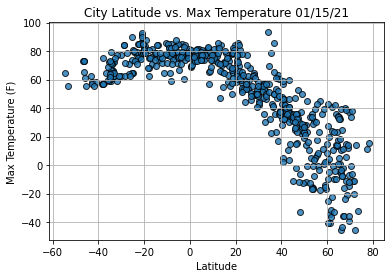

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

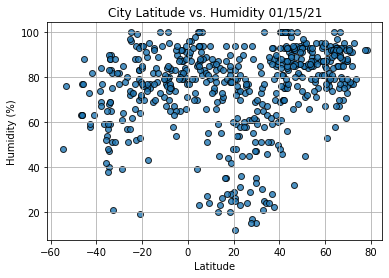

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


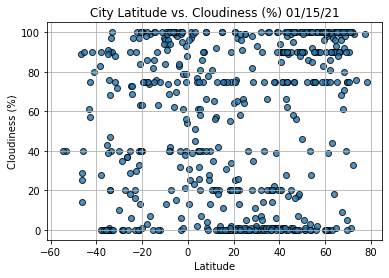

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

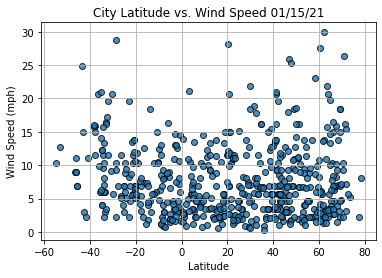

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-33-d58af2435033>, line 3)

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Barrow,71.2906,-156.7887,-11.20,77,1,16.11,US,2021-01-15 23:46:09
2,Yellowknife,62.4560,-114.3525,10.40,92,90,13.80,CA,2021-01-15 23:50:05
4,Thompson,55.7435,-97.8558,6.80,78,75,4.61,CA,2021-01-15 23:50:05
5,Marystown,47.1666,-55.1483,32.81,89,100,25.95,CA,2021-01-15 23:50:05
8,Bandarbeyla,9.4942,50.8122,73.47,79,13,14.58,SO,2021-01-15 23:47:51
